# 1 Inputs

In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import IsolationForest


# 2 Data Collection

In [2]:

train_DATA = pd.read_csv("data/train.csv")

train_DATA


,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.32740,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
1,0,335.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,5.82350,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
2,0,336.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,6.52280,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
3,0,336.660105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,7.22850,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
4,0,337.160105,-9999.00000,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,9.50200,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.0,-9999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.500000,64.57612,-9999.0,8.5,8.550179,2.613020,0.026474,32.91600,0.109335,5.20765,4.081079,3.646631,10.43060,0.028313,1.0,0.2736
318963,8,12143.000000,66.20669,-9999.0,8.5,8.520521,2.614332,0.024994,28.76523,0.099368,5.23046,4.120065,3.936356,9.47309,0.027530,1.0,0.2344
318964,8,12143.500000,67.43187,-9999.0,8.5,8.521563,2.620479,0.027400,25.70403,0.097774,5.33586,4.662224,4.245169,8.96010,0.023795,1.0,0.2054
318965,8,12144.000000,66.56465,-9999.0,8.5,8.522397,2.623435,0.027175,22.94222,0.089295,5.34635,4.810604,4.372118,8.80637,0.022048,1.0,0.1793


In [3]:
train_DATA = pd.read_csv("data/train.csv")
train_DATA.replace(['-9999', -9999], np.nan, inplace=True)
train_DATA.dropna(axis=0, inplace=True)

# 3 Find Correlations

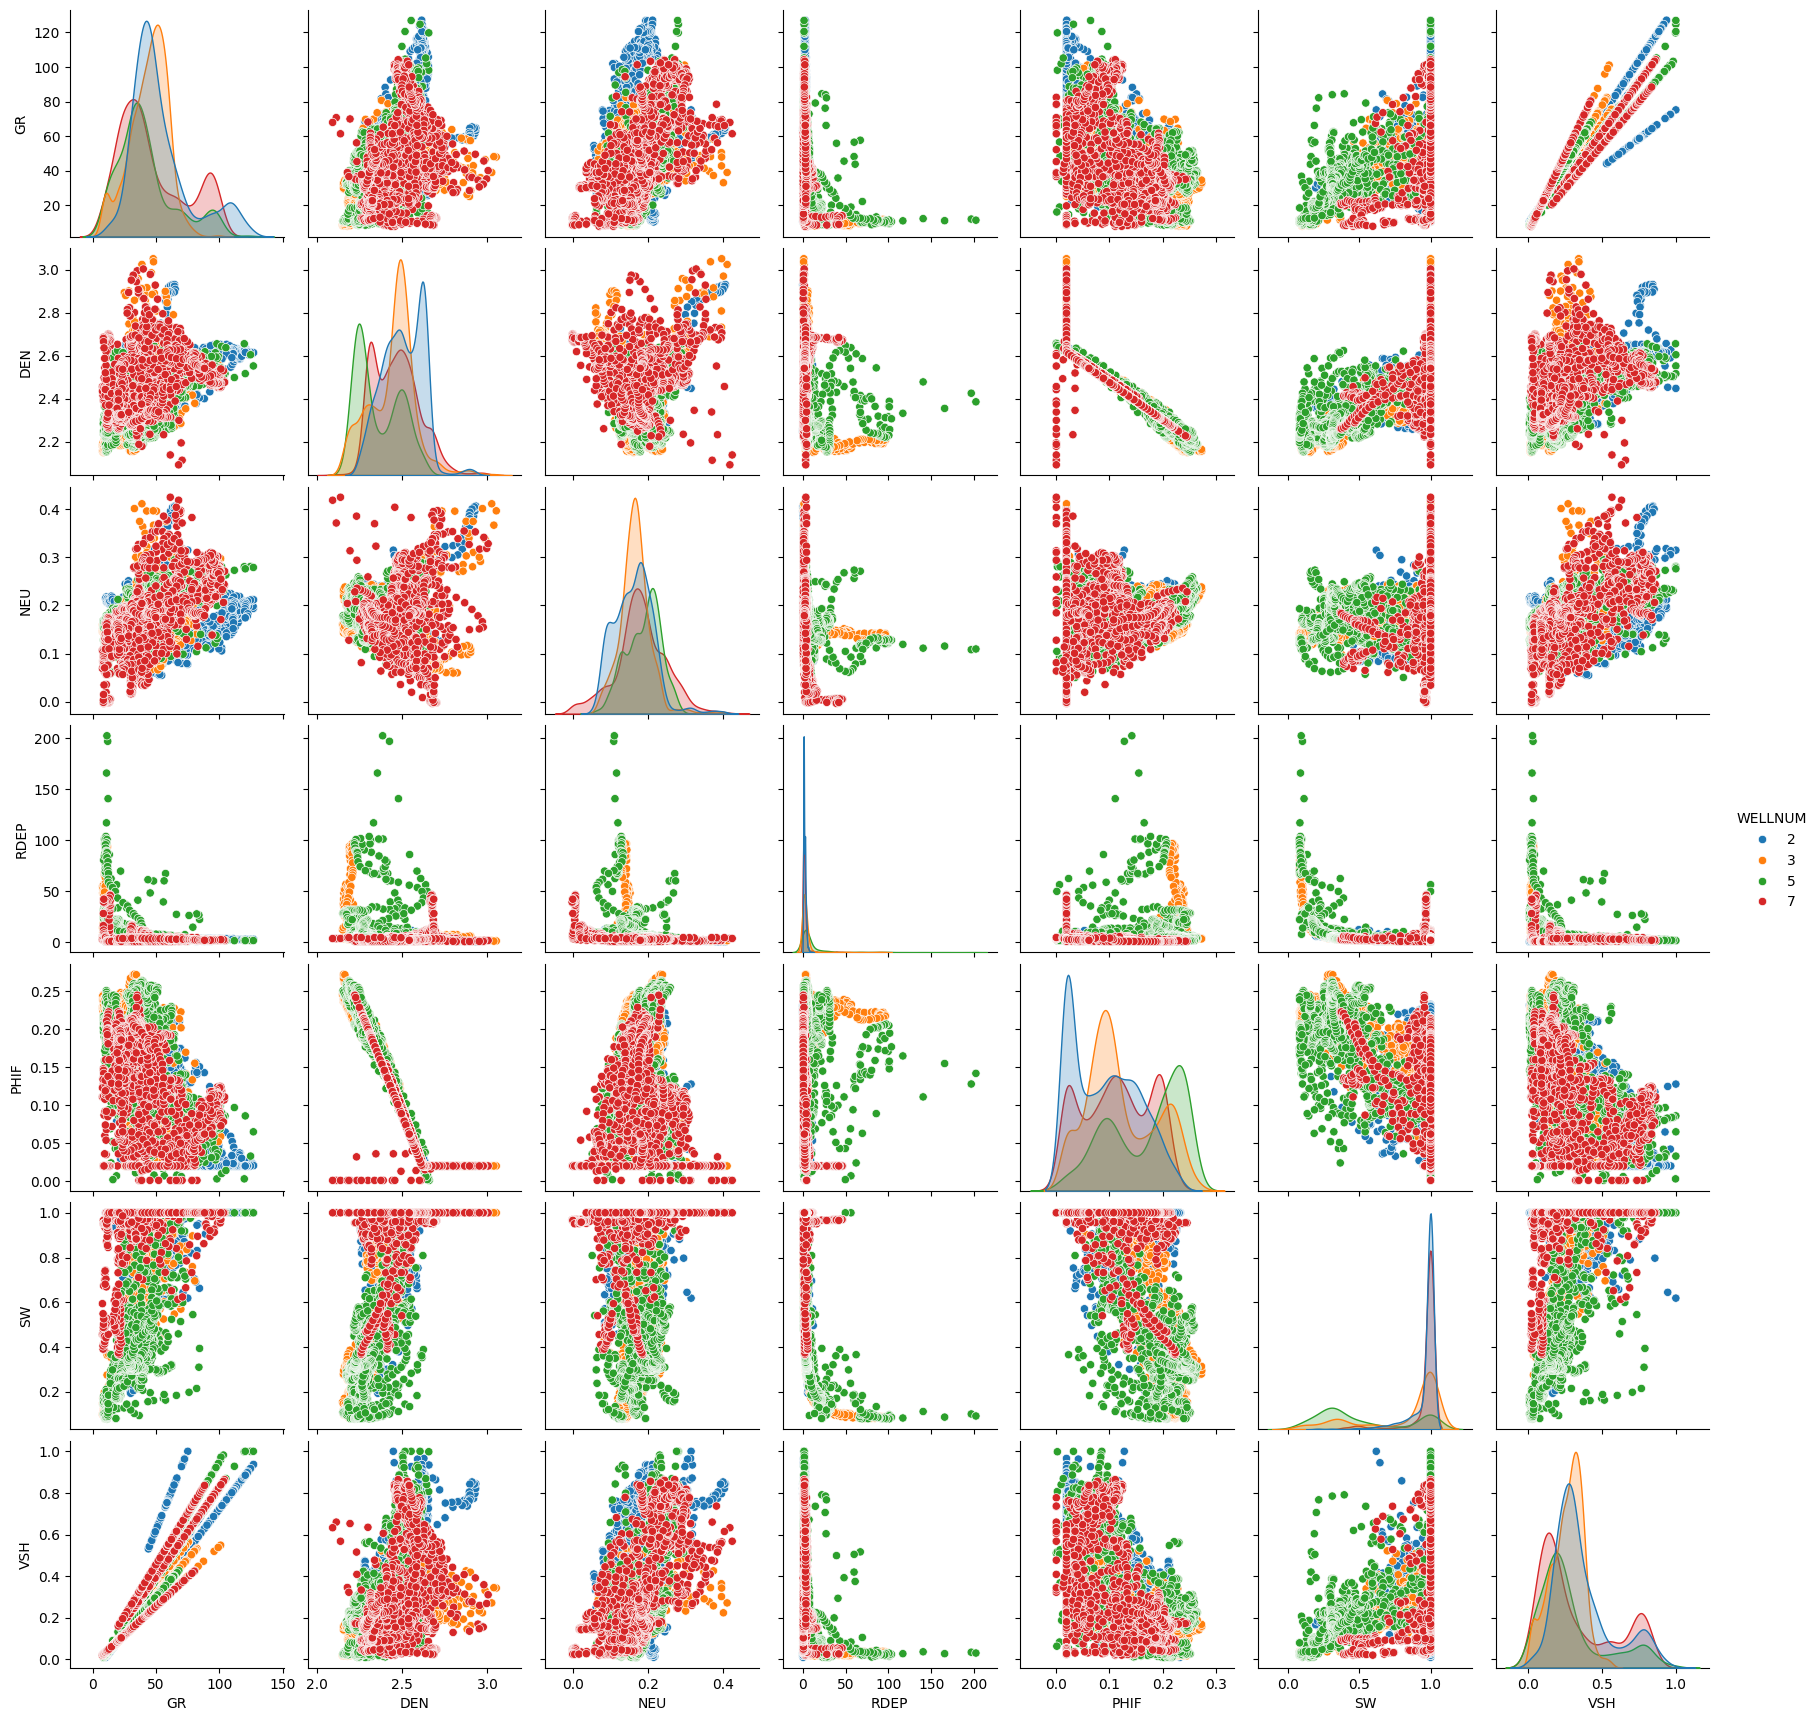

In [4]:
import seaborn as sns
df_new = train_DATA.copy()
df_new['WELLNUM'] = train_DATA['WELLNUM'].astype('str')
sns.pairplot(df_new[['WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM')

In [5]:
corr = train_DATA.corr()
corr.style.background_gradient(cmap='coolwarm')

d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
WELLNUM,1.000000,0.874866,0.164939,0.034771,nan,0.269161,-0.131144,0.163046,-0.081856,0.161412,0.682878,0.035034,0.020862,-0.731549,0.147249,-0.057128,-0.025286
DEPTH,0.874866,1.000000,-0.029919,-0.052688,nan,0.302885,0.036516,0.254749,0.017571,0.075092,0.310740,-0.082413,-0.009033,-0.745904,-0.032321,0.221366,0.068524
DTC,0.164939,-0.029919,1.000000,0.823899,nan,-0.252058,-0.620916,-0.225170,0.056095,0.725129,0.180392,0.018735,-0.019722,0.091173,0.649059,-0.440483,0.071978
DTS,0.034771,-0.052688,0.823899,1.000000,nan,-0.112894,-0.365611,-0.128416,0.247066,0.738005,0.050785,-0.106302,-0.035804,0.190196,0.405885,-0.115626,0.263330
BS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CALI,0.269161,0.302885,-0.252058,-0.112894,nan,1.000000,0.409896,0.297398,0.274625,-0.086383,0.304837,-0.089796,0.006912,-0.216683,-0.465438,0.378823,0.295728
DEN,-0.131144,0.036516,-0.620916,-0.365611,nan,0.409896,1.000000,0.349441,0.447391,-0.162742,-0.064971,-0.176041,0.009937,-0.027991,-0.958047,0.647944,0.486424
DENC,0.163046,0.254749,-0.225170,-0.128416,nan,0.297398,0.349441,1.000000,0.182387,-0.097988,0.006453,-0.139605,-0.107280,-0.246415,-0.380872,0.373351,0.194466
GR,-0.081856,0.017571,0.056095,0.247066,nan,0.274625,0.447391,0.182387,1.000000,0.387477,-0.074358,-0.275093,-0.055474,-0.012660,-0.471891,0.448388,0.964024
NEU,0.161412,0.075092,0.725129,0.738005,nan,-0.086383,-0.162742,-0.097988,0.387477,1.000000,0.184526,-0.178674,-0.043608,0.086944,0.240775,-0.022591,0.431728


In [6]:
targets = ['PHIF', 'SW', 'VSH']
features = ['DEN', 'GR', 'NEU', 'PEF', 'RDEP']
col_names = targets + features

clf = IsolationForest(random_state=0).fit_predict(train_DATA[col_names])
train = train_DATA[clf==1]

y_train = train_DATA[targets]
X_train = train_DATA[features]

In [7]:
X_train

,DEN,GR,NEU,PEF,RDEP
96439,2.4477,75.1668,0.3147,0.0490,1.5882
96440,2.4529,71.3828,0.3038,0.0409,0.8997
96441,2.4648,65.6385,0.2948,0.0300,0.8494
96442,2.4881,58.8981,0.2886,0.0201,0.8659
96443,2.5250,53.5140,0.2839,0.0158,0.8017
...,...,...,...,...,...
295605,2.5495,84.6604,0.1843,7.0291,1.8973
295606,2.5454,85.6628,0.1812,7.1173,1.8557
295607,2.5431,86.6581,0.1773,7.1823,1.8056
295608,2.5422,87.6700,0.1758,7.2119,1.7597


# 4 Machine Learning Pipeline

In [8]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(GradientBoostingRegressor()))
])

parameters = {
    'regressor__estimator__n_estimators': range(80,100,10),
    'regressor__estimator__loss': ["squared_error", 'poisson']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring="r2")


grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_

best_model = grid_search.best_estimator_


d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\repos\IndustrialIILab\lab1\venv\Lib\site-packages\sklearn\pipeline.py", line 4

In [9]:
import pickle

with open("model.pk", "wb") as f:
    pickle.dump(best_model, f)

In [10]:
X_test = pd.read_csv("data/test.csv")
y_test = pd.read_csv("data/real_test_result.csv")


In [11]:

score = best_model.score(X_test[features], y_test)

print("Лучшие гиперпараметры:", best_parameters)
print("Оценка R^2 лучшей модели:", score)

Лучшие гиперпараметры: {'regressor__estimator__loss': 'squared_error', 'regressor__estimator__n_estimators': 90}
Оценка R^2 лучшей модели: 0.8624311786123942


# 5 RMSE

In [12]:
from sklearn.metrics import mean_squared_error


y_pred = best_model.predict(X_test[features])
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse: ", rmse)

rmse:  0.08784141146367917
